# ランダムフォレストモデルで重要度を確認する

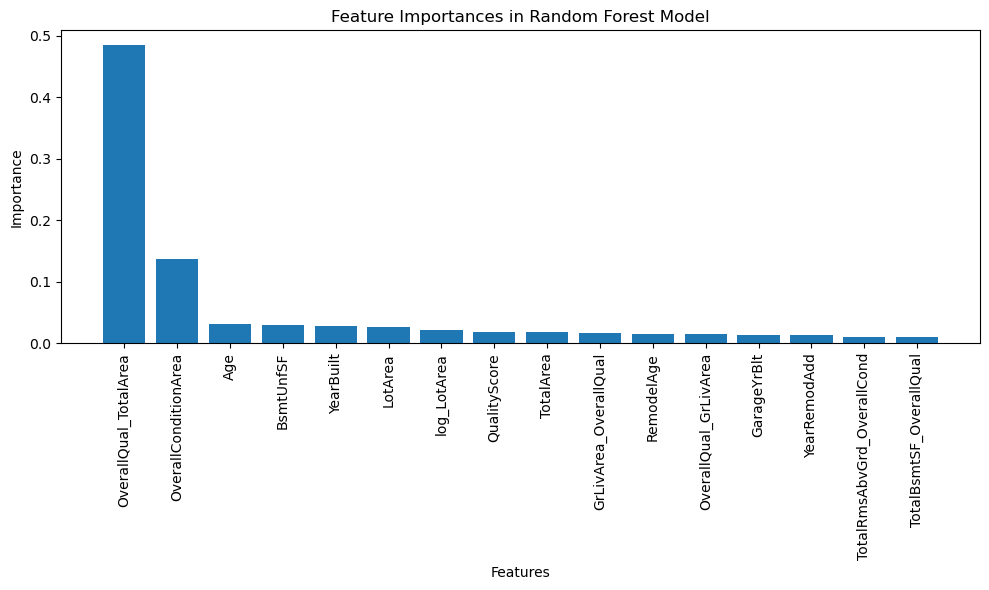

選択された重要な特徴量:
['OverallQual_TotalArea', 'OverallConditionArea', 'Age', 'BsmtUnfSF', 'YearBuilt', 'LotArea', 'log_LotArea', 'QualityScore', 'TotalArea', 'GrLivArea_OverallQual', 'RemodelAge', 'OverallQual_GrLivArea', 'GarageYrBlt', 'YearRemodAdd', 'TotalRmsAbvGrd_OverallCond', 'TotalBsmtSF_OverallQual']
重要度が0.01以上の特徴量のデータを/Users/hayakawakazue/Downloads/house_price/train/cluster_0_important_features.csvに保存しました。
モデルを/Users/hayakawakazue/Downloads/house_price/model/cluster_0_random_forest.joblibに保存しました。


In [7]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# クラスタ0のデータの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/cluster_0.csv'
data = pd.read_csv(data_path)

# 目的変数'SalePrice'とその他の特徴量を分ける
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルの初期化とトレーニング
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 特徴量の重要性を取得
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# 重要度が0.01以上の特徴量のみフィルタリング
important_features = feature_importances[feature_importances['importance'] > 0.01].index.tolist()

# 特徴量の重要性をプロット
plt.figure(figsize=(10, 6))
plt.bar(feature_importances[feature_importances['importance'] > 0.01].index,
        feature_importances[feature_importances['importance'] > 0.01]['importance'])
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 重要な特徴量と目的変数を含むデータを選択
important_data = data[['SalePrice'] + important_features]

# ファイルに保存
save_path = '/Users/hayakawakazue/Downloads/house_price/train/cluster_0_important_features.csv'
important_data.to_csv(save_path, index=False)

# モデルの保存
model_save_path = '/Users/hayakawakazue/Downloads/house_price/model/cluster_0_random_forest.joblib'
joblib.dump(model, model_save_path)

# 重要な特徴量のリストをプリント
print("選択された重要な特徴量:")
print(important_features)
print(f"重要度が0.01以上の特徴量のデータを{save_path}に保存しました。")
print(f"モデルを{model_save_path}に保存しました。")


# 残差分析するために特徴量を確認する

In [5]:
 import pandas as pd
# クラスタ0のデータの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/cluster_0_important_features.csv'
data = pd.read_csv(data_path)

# 列名（特徴量名）の表示
print("含まれる特徴量のリスト:")
print(data.columns.tolist())

含まれる特徴量のリスト:
['SalePrice', 'OverallQual_TotalArea', 'OverallConditionArea', 'Age', 'BsmtUnfSF', 'YearBuilt', 'LotArea', 'log_LotArea', 'QualityScore', 'TotalArea', 'GrLivArea_OverallQual', 'RemodelAge', 'OverallQual_GrLivArea', 'GarageYrBlt', 'YearRemodAdd', 'TotalRmsAbvGrd_OverallCond', 'TotalBsmtSF_OverallQual']


# 残差分析

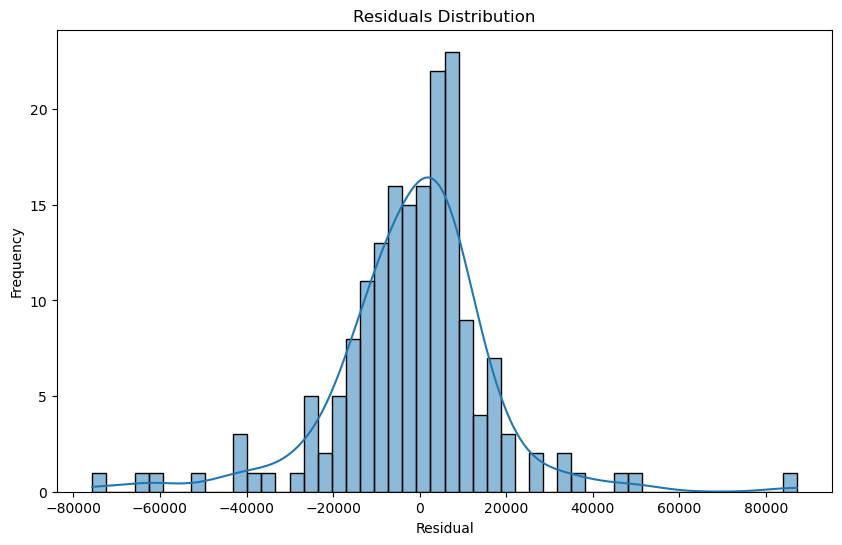

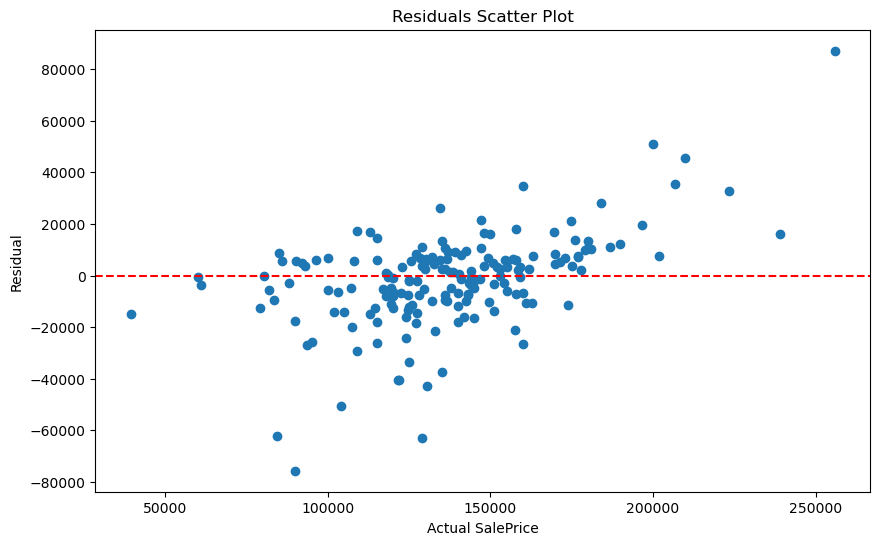

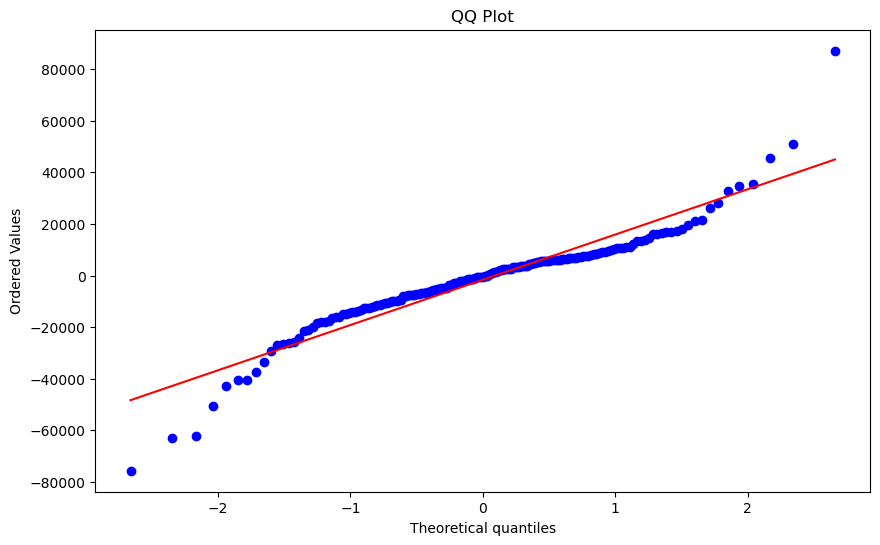

In [13]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/cluster_0.csv'
data = pd.read_csv(data_path)

# 選択された特徴量
selected_features = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
    'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 
    'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 
    'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GrLivArea_OverallQual', 
    'TotalBsmtSF_OverallQual', 'TotalArea', 'QualityScore', 'Age', 'RemodelAge', 
    'OverallConditionArea', 'TotalRmsAbvGrd_OverallCond', 'Functional_OverallQual', 
    'log_LotArea', 'sqrt_GrLivArea', 'OverallQual_GrLivArea', 'log_1stFlrSF', 'sqrt_TotalBsmtSF', 
    'OverallQual_TotalArea', 'BsmtQual_ExterQual', 'Exterior2nd_VinylSd', 'Foundation_CBlock', 
    'Foundation_PConc', 'GarageType_Detchd', 'Cluster'
]

# 特徴量と目的変数を分ける
X = data[selected_features]
y = data['SalePrice']

# 無限値をNaNに置き換え
X = X.replace([np.inf, -np.inf], np.nan)

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データの前処理：nanを含む行を削除し、対応する y も削除
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# モデルの読み込み
model_path = '/Users/hayakawakazue/Downloads/house_price/model/cluster_0_random_forest.joblib'
best_model = joblib.load(model_path)

# テストデータを使った予測
y_pred = best_model.predict(X_test)

# 残差の計算
residuals = y_test - y_pred

# 残差プロット
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# 残差の散布図
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Scatter Plot')
plt.xlabel('Actual SalePrice')
plt.ylabel('Residual')
plt.show()

# QQプロット
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()
